# Probability Distributions Tutorial - SOLVED

This notebook covers methods to work with probability distributions in Python:
- **scipy.stats**: Generate random variables, compute PDF/PMF, CDF, moments, and quantiles
- **Discrete distributions**: Bernoulli, Binomial, Poisson
- **Continuous distributions**: Normal, t, Exponential, Gamma, Log-Normal
- **Visualization with seaborn**: Histograms, KDE plots, comparing distributions
- **Confidence intervals**: Computing and interpreting CIs
- **Moments**: Mean, variance, skewness, kurtosis

Each section includes examples and exercises to help you practice.

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

---
## 1. Introduction to scipy.stats

The `scipy.stats` module provides a unified interface for working with probability distributions. Each distribution object has common methods:

| Method | Description |
|--------|-------------|
| `rvs(size=n)` | Generate `n` random samples |
| `pdf(x)` / `pmf(x)` | Probability density/mass function at `x` |
| `cdf(x)` | Cumulative distribution function at `x` |
| `ppf(q)` | Percent point function (inverse CDF, quantile) |
| `mean()` | Expected value |
| `var()` | Variance |
| `std()` | Standard deviation |
| `stats(moments='mvsk')` | Mean, variance, skewness, kurtosis |
| `interval(confidence)` | Confidence interval around median |

**Example:**

In [106]:
# Create a normal distribution object with mean=0, std=1
normal_dist = stats.norm(loc=0, scale=1)

# Generate 1000 random samples
samples = normal_dist.rvs(size=1000)

print(f"Sample mean: {samples.mean():.4f}")
print(f"Sample std:  {samples.std():.4f}")
print(f"Theoretical mean: {normal_dist.mean():.4f}")
print(f"Theoretical std:  {normal_dist.std():.4f}")

Sample mean: 0.0193
Sample std:  0.9787
Theoretical mean: 0.0000
Theoretical std:  1.0000


In [107]:
# Evaluate PDF at specific points
x_values = np.array([-2, -1, 0, 1, 2])
pdf_values = normal_dist.pdf(x_values)
print("PDF values:")
for x, p in zip(x_values, pdf_values):
    print(f"  f({x:2d}) = {p:.4f}")

PDF values:
  f(-2) = 0.0540
  f(-1) = 0.2420
  f( 0) = 0.3989
  f( 1) = 0.2420
  f( 2) = 0.0540


In [108]:
# CDF: Probability that X <= x
print(f"P(X <= 0) = {normal_dist.cdf(0):.4f}")
print(f"P(X <= 1.96) = {normal_dist.cdf(1.96):.4f}")

# PPF (quantile): What value gives P(X <= x) = q?
print(f"95th percentile: {normal_dist.ppf(0.95):.4f}")
print(f"97.5th percentile: {normal_dist.ppf(0.975):.4f}")

P(X <= 0) = 0.5000
P(X <= 1.96) = 0.9750
95th percentile: 1.6449
97.5th percentile: 1.9600


### Exercise 1: Basic scipy.stats Usage

**1.1** Create a normal distribution with mean=5 and std=2. Generate 500 samples and compute the sample mean and standard deviation.

**1.2** What is P(X <= 7) for this distribution? Use the CDF.

**1.3** Find the 90th percentile (the value x such that P(X <= x) = 0.90).

In [109]:
# Exercise 1.1: Normal distribution with mean=5, std=2
dist_1 = stats.norm(loc=5, scale=2)
samples_1 = dist_1.rvs(size=500)

print(f"Sample mean: {samples_1.mean():.4f}")
print(f"Sample std: {samples_1.std():.4f}")
print(f"Theoretical mean: {dist_1.mean():.4f}")
print(f"Theoretical std: {dist_1.std():.4f}")

Sample mean: 5.2170
Sample std: 2.0185
Theoretical mean: 5.0000
Theoretical std: 2.0000


In [110]:
# Exercise 1.2: P(X <= 7)
prob = dist_1.cdf(7)
print(f"P(X <= 7) = {prob:.4f}")

# This is equivalent to: (7 - 5) / 2 = 1 standard deviation above the mean
# For standard normal, P(Z <= 1) ≈ 0.8413

P(X <= 7) = 0.8413


In [111]:
# Exercise 1.3: 90th percentile
percentile_90 = dist_1.ppf(0.90)
print(f"90th percentile: {percentile_90:.4f}")

# Verification: P(X <= percentile_90) should be 0.90
print(f"Verification: P(X <= {percentile_90:.4f}) = {dist_1.cdf(percentile_90):.4f}")

90th percentile: 7.5631
Verification: P(X <= 7.5631) = 0.9000


---
## 2. Discrete Distributions

### 2.1 Bernoulli Distribution

A single trial with probability `p` of success.

$$P(X = k) = p^k (1-p)^{1-k}, \quad k \in \{0, 1\}$$

**Example:**

In [112]:
# Bernoulli distribution with p=0.7
bernoulli_dist = stats.bernoulli(p=0.7)

# Generate samples (coin flips)
samples = bernoulli_dist.rvs(size=1000)
print(f"Number of successes: {samples.sum()} out of 1000")
print(f"Empirical probability: {samples.mean():.3f}")
print(f"Theoretical mean: {bernoulli_dist.mean():.3f}")
print(f"Theoretical variance: {bernoulli_dist.var():.3f}")

Number of successes: 699 out of 1000
Empirical probability: 0.699
Theoretical mean: 0.700
Theoretical variance: 0.210


In [113]:
# PMF: Probability mass function
print(f"P(X=0) = {bernoulli_dist.pmf(0):.3f}")
print(f"P(X=1) = {bernoulli_dist.pmf(1):.3f}")

P(X=0) = 0.300
P(X=1) = 0.700


### 2.2 Binomial Distribution

Number of successes in `n` independent Bernoulli trials.

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

**Example:**

In [114]:
# Binomial: n=20 trials, p=0.3 success probability
binom_dist = stats.binom(n=20, p=0.3)

# Generate samples
samples = binom_dist.rvs(size=1000)

# Theoretical vs empirical
print(f"Theoretical mean: {binom_dist.mean():.2f}")
print(f"Empirical mean: {samples.mean():.2f}")
print(f"Theoretical variance: {binom_dist.var():.2f}")
print(f"Empirical variance: {samples.var():.2f}")

Theoretical mean: 6.00
Empirical mean: 5.98
Theoretical variance: 4.20
Empirical variance: 4.04


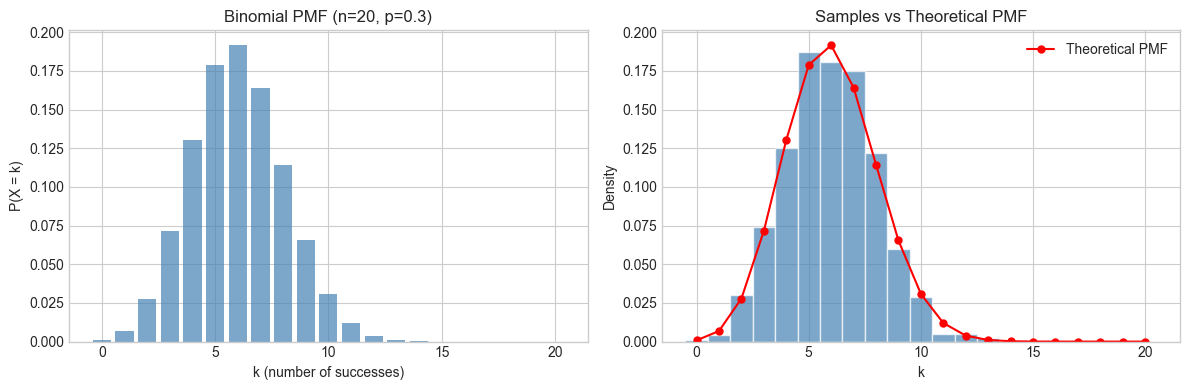

In [115]:
# Visualize the PMF
k = np.arange(0, 21)
pmf = binom_dist.pmf(k)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PMF
axes[0].bar(k, pmf, color='steelblue', alpha=0.7)
axes[0].set_xlabel('k (number of successes)')
axes[0].set_ylabel('P(X = k)')
axes[0].set_title('Binomial PMF (n=20, p=0.3)')

# Histogram of samples
axes[1].hist(samples, bins=np.arange(-0.5, 21.5, 1), density=True, 
             color='steelblue', alpha=0.7, edgecolor='white')
axes[1].plot(k, pmf, 'ro-', markersize=5, label='Theoretical PMF')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Density')
axes[1].set_title('Samples vs Theoretical PMF')
axes[1].legend()

plt.tight_layout()
plt.show()

### 2.3 Poisson Distribution

Count of events in a fixed interval with rate $\lambda$.

$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

**Example:**

In [116]:
# Poisson distribution with lambda=5
poisson_dist = stats.poisson(mu=5)

# Generate samples
samples = poisson_dist.rvs(size=1000)

print(f"Theoretical mean: {poisson_dist.mean():.2f}")
print(f"Empirical mean: {samples.mean():.2f}")
print(f"Theoretical variance: {poisson_dist.var():.2f}")
print(f"Empirical variance: {samples.var():.2f}")
print("\n→ Note: For Poisson, mean = variance = λ")

Theoretical mean: 5.00
Empirical mean: 4.92
Theoretical variance: 5.00
Empirical variance: 4.13

→ Note: For Poisson, mean = variance = λ


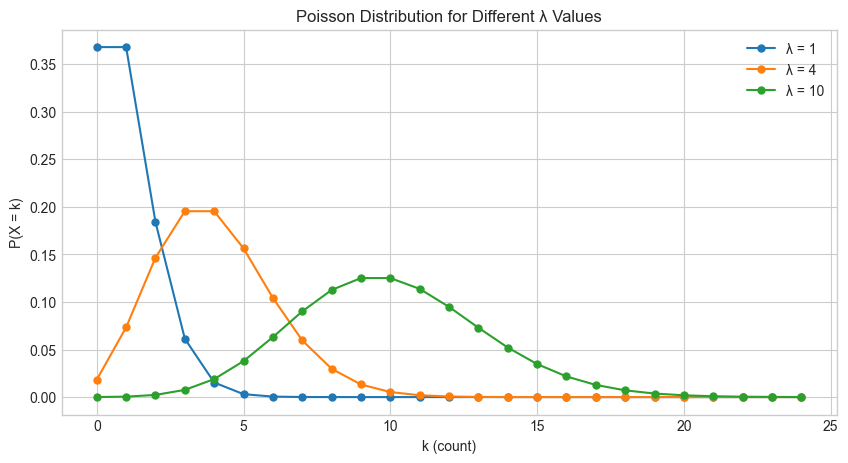

In [117]:
# Compare Poisson distributions with different lambda values
fig, ax = plt.subplots(figsize=(10, 5))

for lam in [1, 4, 10]:
    dist = stats.poisson(mu=lam)
    k = np.arange(0, 25)
    ax.plot(k, dist.pmf(k), 'o-', label=f'λ = {lam}', markersize=5)

ax.set_xlabel('k (count)')
ax.set_ylabel('P(X = k)')
ax.set_title('Poisson Distribution for Different λ Values')
ax.legend()
plt.show()

### Exercise 2: Discrete Distributions

**2.1** Create a binomial distribution with n=50 and p=0.4. Generate 1000 samples and compare the sample mean/variance with theoretical values.

**2.2** For the binomial distribution above, what is P(X = 20)? What is P(X ≤ 20)?

**2.3** Create a Poisson distribution with λ=8. Plot the PMF for k=0 to 25.

**2.4** For RNA-seq data, if a gene has an average of 100 reads, what is the probability of observing fewer than 80 reads? (Use Poisson)

In [118]:
# Exercise 2.1: Binomial n=50, p=0.4
binom_2 = stats.binom(n=50, p=0.4)
samples_2 = binom_2.rvs(size=1000)

print("Binomial(n=50, p=0.4):")
print(f"  Theoretical mean: {binom_2.mean():.2f}")
print(f"  Empirical mean: {samples_2.mean():.2f}")
print(f"  Theoretical variance: {binom_2.var():.2f}")
print(f"  Empirical variance: {samples_2.var():.2f}")
print(f"\n  (Theoretical: mean = np = 20, var = np(1-p) = 12)")

Binomial(n=50, p=0.4):
  Theoretical mean: 20.00
  Empirical mean: 20.03
  Theoretical variance: 12.00
  Empirical variance: 11.89

  (Theoretical: mean = np = 20, var = np(1-p) = 12)


In [119]:
# Exercise 2.2: P(X=20) and P(X<=20)
p_equal_20 = binom_2.pmf(20)
p_leq_20 = binom_2.cdf(20)

print(f"P(X = 20) = {p_equal_20:.4f}")
print(f"P(X ≤ 20) = {p_leq_20:.4f}")

P(X = 20) = 0.1146
P(X ≤ 20) = 0.5610


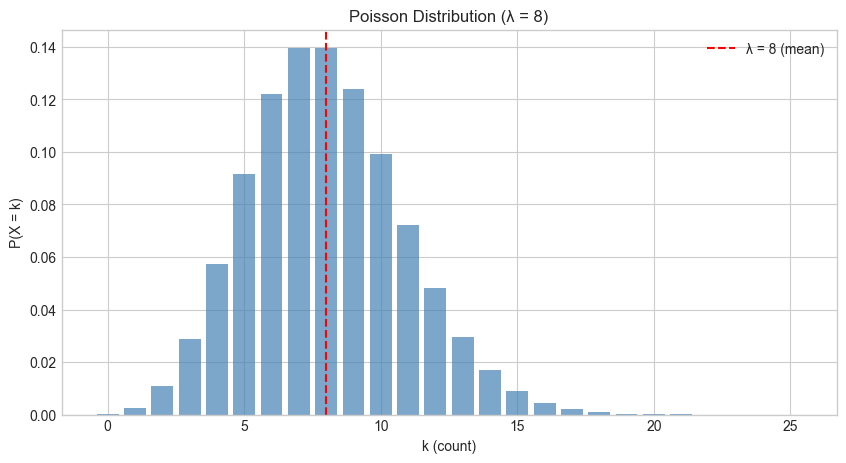

In [120]:
# Exercise 2.3: Poisson PMF plot
poisson_8 = stats.poisson(mu=8)
k = np.arange(0, 26)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(k, poisson_8.pmf(k), color='steelblue', alpha=0.7)
ax.set_xlabel('k (count)')
ax.set_ylabel('P(X = k)')
ax.set_title('Poisson Distribution (λ = 8)')
ax.axvline(x=8, color='red', linestyle='--', label='λ = 8 (mean)')
ax.legend()
plt.show()

In [121]:
# Exercise 2.4: RNA-seq reads problem
poisson_100 = stats.poisson(mu=100)
p_less_80 = poisson_100.cdf(79)  # P(X < 80) = P(X <= 79)

print(f"Average reads: 100")
print(f"P(X < 80) = {p_less_80:.4f}")
print(f"\nThis is about {p_less_80*100:.2f}% probability")
print("→ Observing fewer than 80 reads when expecting 100 is quite rare (~2%)")

Average reads: 100
P(X < 80) = 0.0175

This is about 1.75% probability
→ Observing fewer than 80 reads when expecting 100 is quite rare (~2%)


---
## 3. Continuous Distributions

### 3.1 Normal Distribution

The most important continuous distribution, characterized by mean $\mu$ and standard deviation $\sigma$.

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Example:**

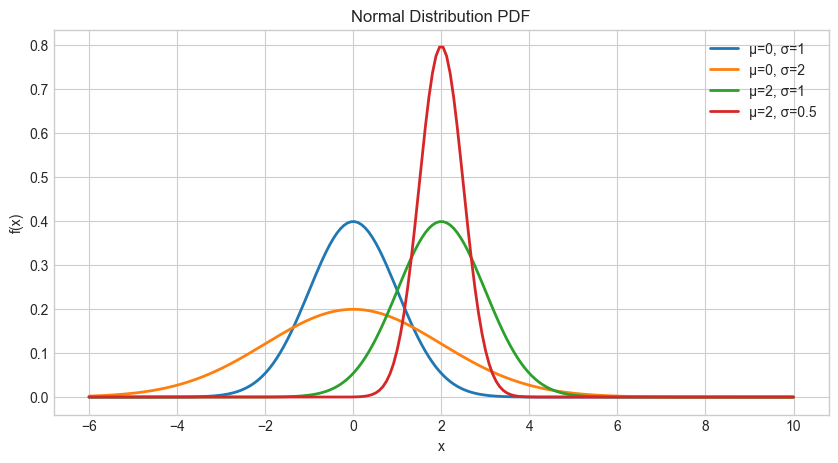

In [122]:
# Compare normal distributions with different parameters
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-6, 10, 200)

params = [(0, 1), (0, 2), (2, 1), (2, 0.5)]
for mu, sigma in params:
    dist = stats.norm(loc=mu, scale=sigma)
    ax.plot(x, dist.pdf(x), label=f'μ={mu}, σ={sigma}', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Normal Distribution PDF')
ax.legend()
plt.show()

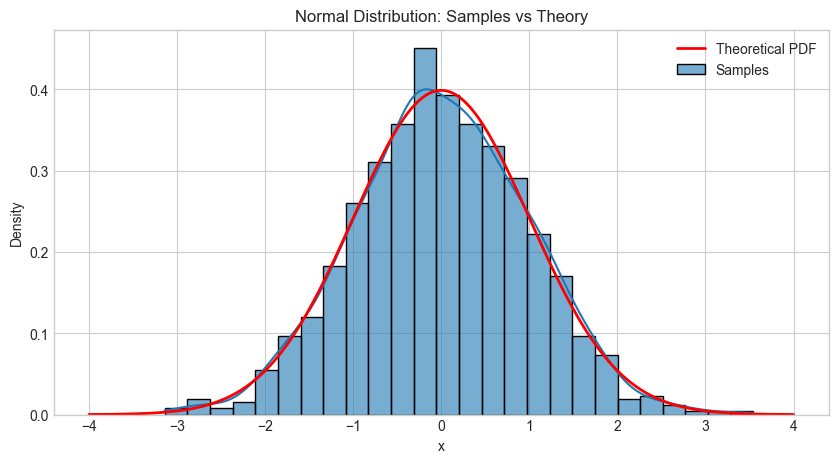

In [123]:
# Visualize samples vs theoretical PDF using seaborn
normal_dist = stats.norm(loc=0, scale=1)
samples = normal_dist.rvs(size=1000)

fig, ax = plt.subplots(figsize=(10, 5))

# Histogram with KDE
sns.histplot(samples, stat='density', kde=True, ax=ax, alpha=0.6, label='Samples')

# Theoretical PDF
x = np.linspace(-4, 4, 200)
ax.plot(x, normal_dist.pdf(x), 'r-', linewidth=2, label='Theoretical PDF')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Normal Distribution: Samples vs Theory')
ax.legend()
plt.show()

### 3.2 Student's t-Distribution

Used for small sample inference. Has heavier tails than normal.

**Example:**

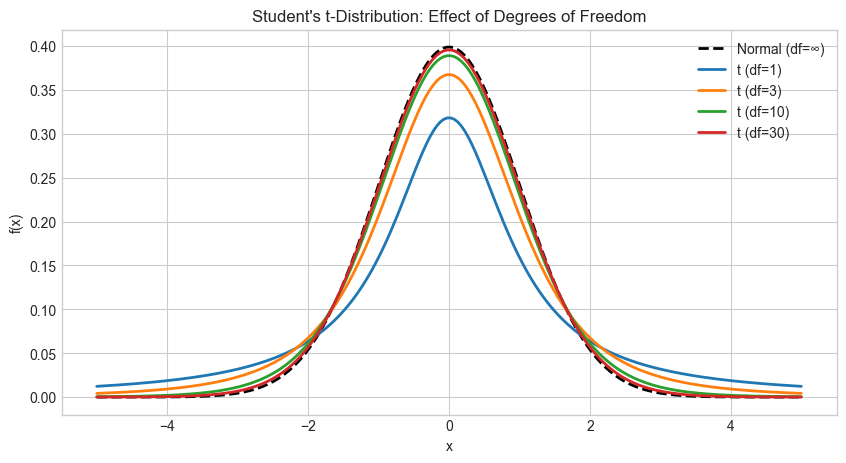

→ As df increases, t-distribution approaches normal distribution
→ Lower df means heavier tails (more extreme values likely)


In [124]:
# Compare t-distributions with different degrees of freedom
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-5, 5, 200)

# Normal for reference
ax.plot(x, stats.norm.pdf(x), 'k--', linewidth=2, label='Normal (df=∞)')

for df in [1, 3, 10, 30]:
    t_dist = stats.t(df=df)
    ax.plot(x, t_dist.pdf(x), label=f't (df={df})', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title("Student's t-Distribution: Effect of Degrees of Freedom")
ax.legend()
plt.show()

print("→ As df increases, t-distribution approaches normal distribution")
print("→ Lower df means heavier tails (more extreme values likely)")

### 3.3 Exponential Distribution

Time between events in a Poisson process. Memoryless property.

$$f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$$

**Example:**

In [125]:
# Exponential distribution (scale = 1/lambda)
# For lambda=2, scale=0.5
exp_dist = stats.expon(scale=0.5)  # lambda=2, mean=0.5

samples = exp_dist.rvs(size=1000)

print(f"Theoretical mean (1/λ): {exp_dist.mean():.3f}")
print(f"Empirical mean: {samples.mean():.3f}")
print(f"Theoretical variance (1/λ²): {exp_dist.var():.3f}")
print(f"Empirical variance: {samples.var():.3f}")

Theoretical mean (1/λ): 0.500
Empirical mean: 0.504
Theoretical variance (1/λ²): 0.250
Empirical variance: 0.274


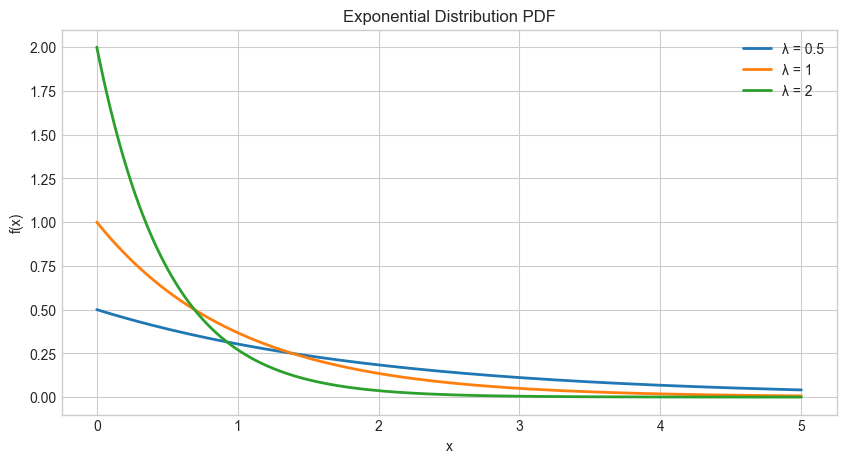

In [126]:
# Visualize exponential distributions
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(0, 5, 200)

for lam in [0.5, 1, 2]:
    dist = stats.expon(scale=1/lam)
    ax.plot(x, dist.pdf(x), label=f'λ = {lam}', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Exponential Distribution PDF')
ax.legend()
plt.show()

### 3.4 Gamma Distribution

Generalization of exponential; sum of exponentials.

**Example:**

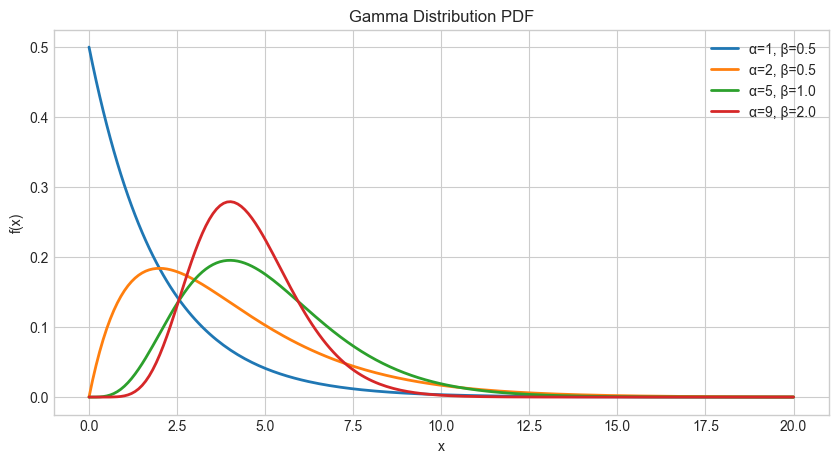

→ α=1 gives exponential distribution
→ Higher α gives more symmetric, bell-shaped curves


In [127]:
# Gamma distribution: shape=a, scale=1/beta
# scipy uses: a (shape) and scale
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(0, 20, 200)

params = [(1, 2), (2, 2), (5, 1), (9, 0.5)]
for a, scale in params:
    dist = stats.gamma(a=a, scale=scale)
    ax.plot(x, dist.pdf(x), label=f'α={a}, β={1/scale:.1f}', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Gamma Distribution PDF')
ax.legend()
plt.show()

print("→ α=1 gives exponential distribution")
print("→ Higher α gives more symmetric, bell-shaped curves")

### 3.5 Log-Normal Distribution

If log(X) is normally distributed, X is log-normally distributed. Common in biology.

**Example:**

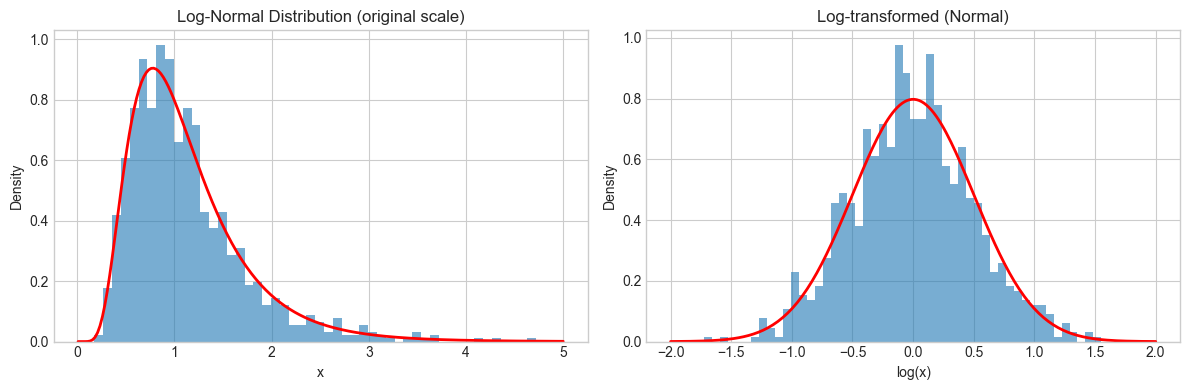

→ Gene expression data often follows log-normal distribution
→ Log-transformation makes it approximately normal


In [128]:
# Log-normal: s=sigma of log(X), scale=exp(mu)
# If Y ~ N(mu, sigma²), then X = exp(Y) ~ LogNormal

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Generate log-normal samples
mu, sigma = 0, 0.5
lognorm_dist = stats.lognorm(s=sigma, scale=np.exp(mu))
samples = lognorm_dist.rvs(size=1000)

# Plot on original scale
x = np.linspace(0.01, 5, 200)
axes[0].hist(samples, bins=50, density=True, alpha=0.6)
axes[0].plot(x, lognorm_dist.pdf(x), 'r-', linewidth=2, label='PDF')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].set_title('Log-Normal Distribution (original scale)')

# Plot on log scale
log_samples = np.log(samples)
axes[1].hist(log_samples, bins=50, density=True, alpha=0.6)
x_log = np.linspace(-2, 2, 200)
axes[1].plot(x_log, stats.norm(mu, sigma).pdf(x_log), 'r-', linewidth=2)
axes[1].set_xlabel('log(x)')
axes[1].set_ylabel('Density')
axes[1].set_title('Log-transformed (Normal)')

plt.tight_layout()
plt.show()

print("→ Gene expression data often follows log-normal distribution")
print("→ Log-transformation makes it approximately normal")

### Exercise 3: Continuous Distributions

**3.1** Generate 1000 samples from a t-distribution with df=5. Compute the sample kurtosis and compare it to the normal distribution (which has kurtosis=3).

**3.2** If the time between cell divisions follows an exponential distribution with mean=2 hours, what is the probability that a cell divides within 1 hour?

**3.3** Create a gamma distribution with shape=3 and rate=0.5. Generate 1000 samples and plot a histogram with the theoretical PDF overlaid.

**3.4** Gene expression levels often follow a log-normal distribution. If log(expression) ~ N(5, 0.8²), generate 500 samples and show histograms on both original and log scales.

In [129]:
# Exercise 3.1: t-distribution kurtosis
t_dist = stats.t(df=5)
t_samples = t_dist.rvs(size=1000)

# Sample kurtosis (fisher=False gives regular kurtosis, not excess)
sample_kurtosis = stats.kurtosis(t_samples, fisher=False)
normal_kurtosis = 3  # Normal has kurtosis = 3

# Theoretical kurtosis for t-distribution: 3 + 6/(df-4) for df > 4
theoretical_kurtosis = 3 + 6 / (5 - 4)

print(f"Sample kurtosis: {sample_kurtosis:.3f}")
print(f"Theoretical kurtosis (t, df=5): {theoretical_kurtosis:.3f}")
print(f"Normal kurtosis: {normal_kurtosis}")
print(f"\n→ t-distribution (df=5) has higher kurtosis (heavier tails)")

Sample kurtosis: 5.908
Theoretical kurtosis (t, df=5): 9.000
Normal kurtosis: 3

→ t-distribution (df=5) has higher kurtosis (heavier tails)


In [130]:
# Exercise 3.2: Cell division probability
# Mean = 2 hours, so scale = 2 (scale = 1/λ, mean = 1/λ)
exp_cell = stats.expon(scale=2)

# P(X <= 1) = probability of division within 1 hour
prob_1hour = exp_cell.cdf(1)

print(f"Mean time between divisions: 2 hours")
print(f"P(division within 1 hour) = {prob_1hour:.4f}")
print(f"\nThis is {prob_1hour*100:.1f}% probability")

# Verification: 1 - e^(-1/2) ≈ 0.3935
print(f"Analytical: 1 - e^(-0.5) = {1 - np.exp(-0.5):.4f}")

Mean time between divisions: 2 hours
P(division within 1 hour) = 0.3935

This is 39.3% probability
Analytical: 1 - e^(-0.5) = 0.3935


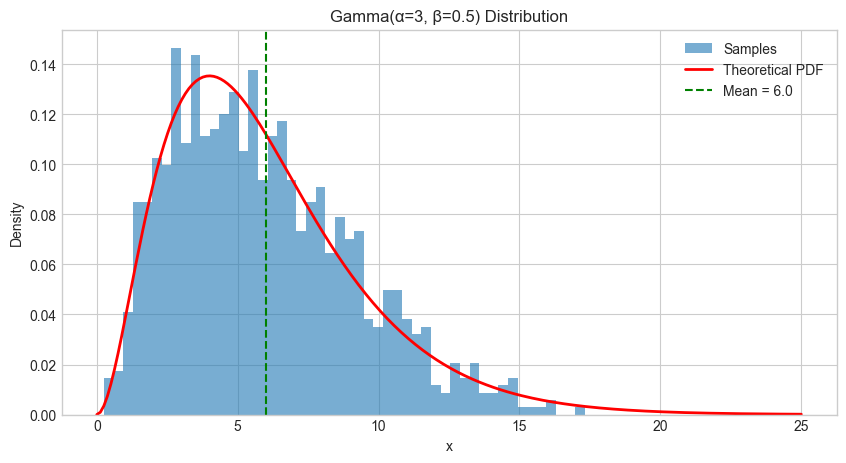

Theoretical mean (α/β): 6.0
Theoretical variance (α/β²): 12.0


In [131]:
# Exercise 3.3: Gamma distribution plot
# shape = 3, rate = 0.5, so scale = 1/0.5 = 2
gamma_dist = stats.gamma(a=3, scale=2)
gamma_samples = gamma_dist.rvs(size=1000)

fig, ax = plt.subplots(figsize=(10, 5))

# Histogram
ax.hist(gamma_samples, bins=50, density=True, alpha=0.6, label='Samples')

# Theoretical PDF
x = np.linspace(0, 25, 200)
ax.plot(x, gamma_dist.pdf(x), 'r-', linewidth=2, label='Theoretical PDF')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Gamma(α=3, β=0.5) Distribution')
ax.legend()

# Add mean line
ax.axvline(gamma_dist.mean(), color='green', linestyle='--', 
           label=f'Mean = {gamma_dist.mean():.1f}')
ax.legend()
plt.show()

print(f"Theoretical mean (α/β): {3/0.5:.1f}")
print(f"Theoretical variance (α/β²): {3/0.5**2:.1f}")

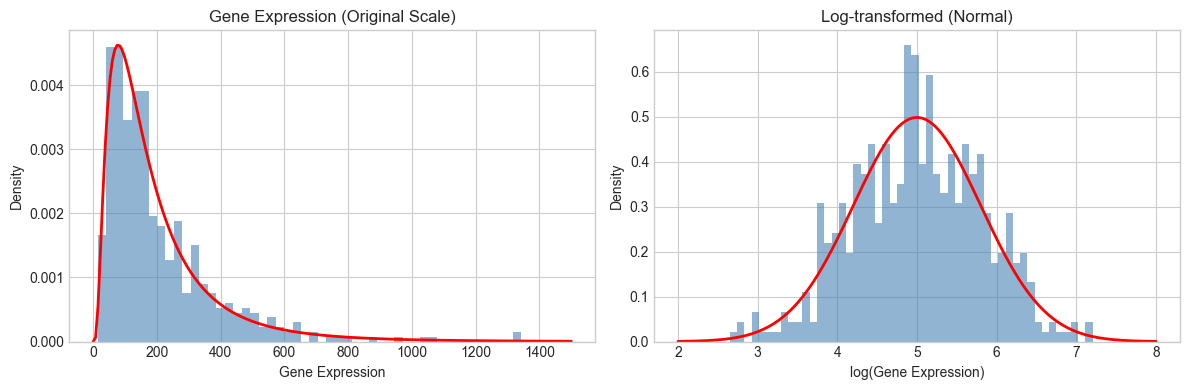

On log scale: mean ≈ 5.00 (expected: 5)
On log scale: std ≈ 0.81 (expected: 0.8)


In [132]:
# Exercise 3.4: Log-normal gene expression
# log(expression) ~ N(5, 0.8²)
# In scipy: s = sigma = 0.8, scale = exp(mu) = exp(5)
mu_log = 5
sigma_log = 0.8

lognorm_gene = stats.lognorm(s=sigma_log, scale=np.exp(mu_log))
gene_samples = lognorm_gene.rvs(size=500)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original scale
axes[0].hist(gene_samples, bins=50, density=True, alpha=0.6, color='steelblue')
x = np.linspace(0, 1500, 200)
axes[0].plot(x, lognorm_gene.pdf(x), 'r-', linewidth=2)
axes[0].set_xlabel('Gene Expression')
axes[0].set_ylabel('Density')
axes[0].set_title('Gene Expression (Original Scale)')

# Log scale
log_gene = np.log(gene_samples)
axes[1].hist(log_gene, bins=50, density=True, alpha=0.6, color='steelblue')
x_log = np.linspace(2, 8, 200)
axes[1].plot(x_log, stats.norm(mu_log, sigma_log).pdf(x_log), 'r-', linewidth=2)
axes[1].set_xlabel('log(Gene Expression)')
axes[1].set_ylabel('Density')
axes[1].set_title('Log-transformed (Normal)')

plt.tight_layout()
plt.show()

print(f"On log scale: mean ≈ {log_gene.mean():.2f} (expected: {mu_log})")
print(f"On log scale: std ≈ {log_gene.std():.2f} (expected: {sigma_log})")

---
## 4. Moments and Distribution Properties

Moments describe the shape of a distribution:
- **Mean (1st moment)**: Central tendency
- **Variance (2nd central moment)**: Spread
- **Skewness (3rd standardized moment)**: Asymmetry
- **Kurtosis (4th standardized moment)**: Tail weight

**Example:**

In [133]:
# Get all moments at once using stats()
distributions = {
    'Normal(0,1)': stats.norm(0, 1),
    't(df=5)': stats.t(df=5),
    'Exponential(λ=1)': stats.expon(scale=1),
    'Gamma(α=2, β=1)': stats.gamma(a=2, scale=1),
}

print(f"{'Distribution':<20} {'Mean':>8} {'Variance':>10} {'Skewness':>10} {'Kurtosis':>10}")
print("-" * 60)

for name, dist in distributions.items():
    m, v, s, k = dist.stats(moments='mvsk')
    print(f"{name:<20} {float(m):>8.3f} {float(v):>10.3f} {float(s):>10.3f} {float(k):>10.3f}")

print("\n→ Excess kurtosis shown (normal = 0)")
print("→ Positive skew = right tail; Positive kurtosis = heavy tails")

Distribution             Mean   Variance   Skewness   Kurtosis
------------------------------------------------------------
Normal(0,1)             0.000      1.000      0.000      0.000
t(df=5)                 0.000      1.667      0.000      6.000
Exponential(λ=1)        1.000      1.000      2.000      6.000
Gamma(α=2, β=1)         2.000      2.000      1.414      3.000

→ Excess kurtosis shown (normal = 0)
→ Positive skew = right tail; Positive kurtosis = heavy tails


In [134]:
# Compute moments from sample data
samples = stats.gamma(a=2, scale=2).rvs(size=1000)

print("Sample moments:")
print(f"  Mean: {np.mean(samples):.3f}")
print(f"  Variance: {np.var(samples, ddof=1):.3f}")
print(f"  Skewness: {stats.skew(samples):.3f}")
print(f"  Kurtosis (excess): {stats.kurtosis(samples):.3f}")

Sample moments:
  Mean: 4.145
  Variance: 8.113
  Skewness: 1.306
  Kurtosis (excess): 2.556


### Exercise 4: Moments

**4.1** Generate 1000 samples from each of: Normal(0,1), Exponential(λ=1), and t(df=3). Compute and compare their sample skewness and kurtosis.

**4.2** Create a log-normal distribution with μ=0, σ=1. Compute its theoretical mean, variance, skewness using `.stats(moments='mvsk')`. How do these compare to sample estimates from 1000 observations?

In [135]:
# Exercise 4.1: Compare moments
np.random.seed(42)

distributions_4 = {
    'Normal(0,1)': stats.norm(0, 1),
    'Exponential(λ=1)': stats.expon(scale=1),
    't(df=3)': stats.t(df=3),
}

print(f"{'Distribution':<20} {'Sample Skewness':>15} {'Sample Kurtosis':>15}")
print("-" * 55)

for name, dist in distributions_4.items():
    samples = dist.rvs(size=1000)
    skew = stats.skew(samples)
    kurt = stats.kurtosis(samples)  # excess kurtosis
    print(f"{name:<20} {skew:>15.3f} {kurt:>15.3f}")

print("\n→ Normal has skew ≈ 0, excess kurtosis ≈ 0")
print("→ Exponential is right-skewed (skew > 0)")
print("→ t(df=3) has heavy tails (high kurtosis)")

Distribution         Sample Skewness Sample Kurtosis
-------------------------------------------------------
Normal(0,1)                    0.117           0.066
Exponential(λ=1)               1.981           5.379
t(df=3)                        0.028           4.029

→ Normal has skew ≈ 0, excess kurtosis ≈ 0
→ Exponential is right-skewed (skew > 0)
→ t(df=3) has heavy tails (high kurtosis)


In [136]:
# Exercise 4.2: Log-normal moments
# Log-normal with μ=0, σ=1
lognorm_4 = stats.lognorm(s=1, scale=np.exp(0))  # s=sigma, scale=exp(mu)

# Theoretical moments
m, v, s, k = lognorm_4.stats(moments='mvsk')
print("Theoretical moments:")
print(f"  Mean: {float(m):.4f}")
print(f"  Variance: {float(v):.4f}")
print(f"  Skewness: {float(s):.4f}")
print(f"  Excess Kurtosis: {float(k):.4f}")

# Sample moments
samples_4 = lognorm_4.rvs(size=1000)
print("\nSample moments (n=1000):")
print(f"  Mean: {np.mean(samples_4):.4f}")
print(f"  Variance: {np.var(samples_4, ddof=1):.4f}")
print(f"  Skewness: {stats.skew(samples_4):.4f}")
print(f"  Excess Kurtosis: {stats.kurtosis(samples_4):.4f}")

print("\n→ Log-normal is highly right-skewed and has heavy tails")

Theoretical moments:
  Mean: 1.6487
  Variance: 4.6708
  Skewness: 6.1849
  Excess Kurtosis: 110.9364

Sample moments (n=1000):
  Mean: 1.5271
  Variance: 3.2034
  Skewness: 3.5314
  Excess Kurtosis: 19.9775

→ Log-normal is highly right-skewed and has heavy tails


---
## 5. Confidence Intervals

### 5.1 CI for the Mean (Normal, σ unknown)

When σ is unknown, use the t-distribution:

$$\bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$$

**Example:**

In [137]:
# Generate sample data
np.random.seed(42)
sample = stats.norm(loc=100, scale=15).rvs(size=30)

# Compute CI for the mean
n = len(sample)
mean = np.mean(sample)
se = stats.sem(sample)  # Standard error of the mean
confidence = 0.95

# Method 1: Using t.interval()
ci = stats.t.interval(confidence, df=n-1, loc=mean, scale=se)
print(f"95% CI for mean: ({ci[0]:.2f}, {ci[1]:.2f})")
print(f"Sample mean: {mean:.2f}")
print(f"True mean: 100")

95% CI for mean: (92.14, 102.22)
Sample mean: 97.18
True mean: 100


In [138]:
# Method 2: Manual calculation
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
margin = t_crit * se

print(f"t-critical value: {t_crit:.3f}")
print(f"Margin of error: {margin:.2f}")
print(f"95% CI: ({mean - margin:.2f}, {mean + margin:.2f})")

t-critical value: 2.045
Margin of error: 5.04
95% CI: (92.14, 102.22)


### 5.2 CI for Proportions (Binomial)

**Wald interval (Normal approximation):**
$$\hat{p} \pm z_{\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

**Example:**

In [139]:
# Example: 23 successes out of 100 trials
successes = 23
n = 100
p_hat = successes / n
confidence = 0.95
z = stats.norm.ppf(1 - (1 - confidence) / 2)

# Wald interval
se = np.sqrt(p_hat * (1 - p_hat) / n)
ci_wald = (p_hat - z * se, p_hat + z * se)
print(f"Wald 95% CI: ({ci_wald[0]:.3f}, {ci_wald[1]:.3f})")

# Wilson score interval (better for small n or extreme p)
def wilson_ci(successes, n, confidence=0.95):
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    p_hat = successes / n
    denominator = 1 + z**2 / n
    center = (p_hat + z**2 / (2*n)) / denominator
    margin = z * np.sqrt((p_hat * (1 - p_hat) + z**2 / (4*n)) / n) / denominator
    return (center - margin, center + margin)

ci_wilson = wilson_ci(successes, n)
print(f"Wilson 95% CI: ({ci_wilson[0]:.3f}, {ci_wilson[1]:.3f})")

Wald 95% CI: (0.148, 0.312)
Wilson 95% CI: (0.158, 0.322)


### 5.3 CI for Poisson Rate

**Example:**

In [140]:
# Observed count: 15 events
observed = 15
confidence = 0.95
alpha = 1 - confidence

# Exact CI using chi-square relationship
lower = stats.chi2.ppf(alpha/2, 2*observed) / 2
upper = stats.chi2.ppf(1 - alpha/2, 2*(observed + 1)) / 2

print(f"Observed count: {observed}")
print(f"95% CI for λ: ({lower:.2f}, {upper:.2f})")

Observed count: 15
95% CI for λ: (8.40, 24.74)


### 5.4 Bootstrap Confidence Intervals

When analytic CIs are not available, use bootstrap resampling.

**Example:**

In [141]:
# Bootstrap CI for the median
np.random.seed(42)
sample = stats.expon(scale=5).rvs(size=50)  # Skewed data

def bootstrap_ci(data, statistic, n_bootstrap=10000, confidence=0.95):
    """Compute bootstrap percentile confidence interval."""
    n = len(data)
    boot_stats = np.zeros(n_bootstrap)
    
    for i in range(n_bootstrap):
        boot_sample = np.random.choice(data, size=n, replace=True)
        boot_stats[i] = statistic(boot_sample)
    
    alpha = 1 - confidence
    lower = np.percentile(boot_stats, 100 * alpha / 2)
    upper = np.percentile(boot_stats, 100 * (1 - alpha / 2))
    
    return lower, upper, boot_stats

# CI for median
lower, upper, boot_medians = bootstrap_ci(sample, np.median)
print(f"Sample median: {np.median(sample):.3f}")
print(f"Bootstrap 95% CI for median: ({lower:.3f}, {upper:.3f})")

# CI for mean (for comparison with t-interval)
lower_mean, upper_mean, _ = bootstrap_ci(sample, np.mean)
t_ci = stats.t.interval(0.95, df=len(sample)-1, loc=np.mean(sample), scale=stats.sem(sample))
print(f"\nBootstrap 95% CI for mean: ({lower_mean:.3f}, {upper_mean:.3f})")
print(f"t-interval 95% CI for mean: ({t_ci[0]:.3f}, {t_ci[1]:.3f})")

Sample median: 2.864
Bootstrap 95% CI for median: (1.728, 4.079)

Bootstrap 95% CI for mean: (3.060, 5.533)
t-interval 95% CI for mean: (2.960, 5.500)


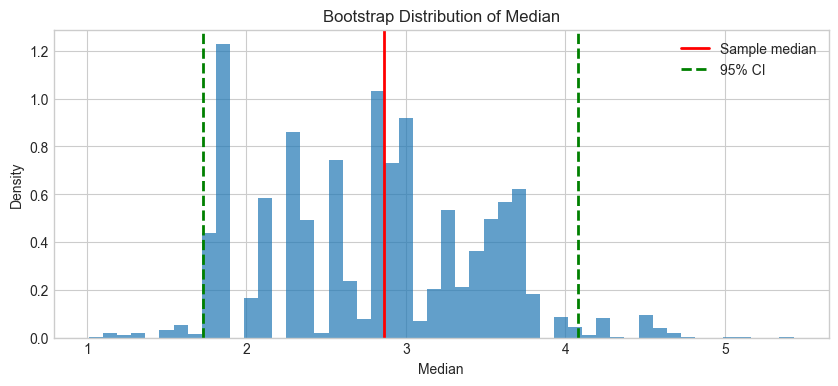

In [142]:
# Visualize bootstrap distribution
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(boot_medians, bins=50, density=True, alpha=0.7)
ax.axvline(np.median(sample), color='red', linestyle='-', linewidth=2, label='Sample median')
ax.axvline(lower, color='green', linestyle='--', linewidth=2, label='95% CI')
ax.axvline(upper, color='green', linestyle='--', linewidth=2)
ax.set_xlabel('Median')
ax.set_ylabel('Density')
ax.set_title('Bootstrap Distribution of Median')
ax.legend()
plt.show()

### Exercise 5: Confidence Intervals

**5.1** Generate 25 samples from N(50, 10²). Compute the 95% CI for the mean using the t-interval. Does the CI contain the true mean?

**5.2** In a clinical trial, 35 out of 150 patients responded to treatment. Compute both the Wald and Wilson 95% CIs for the response rate.

**5.3** A gene shows 42 mutations across 10 samples. Compute the 95% CI for the mutation rate (Poisson).

**5.4** Generate 50 samples from a gamma(α=2, β=0.5) distribution. Use bootstrap to compute a 95% CI for the variance.

In [143]:
# Exercise 5.1: t-interval for mean
np.random.seed(123)
sample_5 = stats.norm(loc=50, scale=10).rvs(size=25)

n = len(sample_5)
mean = np.mean(sample_5)
se = stats.sem(sample_5)

ci = stats.t.interval(0.95, df=n-1, loc=mean, scale=se)

print(f"Sample mean: {mean:.2f}")
print(f"95% CI: ({ci[0]:.2f}, {ci[1]:.2f})")
print(f"True mean: 50")
print(f"\nDoes CI contain true mean? {ci[0] <= 50 <= ci[1]}")

Sample mean: 51.40
95% CI: (46.32, 56.49)
True mean: 50

Does CI contain true mean? True


In [144]:
# Exercise 5.2: Wald and Wilson CIs for proportion
successes = 35
n = 150
p_hat = successes / n
z = stats.norm.ppf(0.975)

# Wald interval
se = np.sqrt(p_hat * (1 - p_hat) / n)
ci_wald = (p_hat - z * se, p_hat + z * se)

# Wilson interval
ci_wilson = wilson_ci(successes, n)

print(f"Response rate: {p_hat:.3f} ({successes}/{n})")
print(f"\nWald 95% CI: ({ci_wald[0]:.3f}, {ci_wald[1]:.3f})")
print(f"Wilson 95% CI: ({ci_wilson[0]:.3f}, {ci_wilson[1]:.3f})")
print(f"\n→ Wilson CI is slightly narrower and better centered")

Response rate: 0.233 (35/150)

Wald 95% CI: (0.166, 0.301)
Wilson 95% CI: (0.173, 0.307)

→ Wilson CI is slightly narrower and better centered


In [145]:
# Exercise 5.3: Poisson CI
# 42 mutations across 10 samples = total count
# CI is for the mean rate λ
observed = 42
alpha = 0.05

# Exact Poisson CI using chi-square
lower = stats.chi2.ppf(alpha/2, 2*observed) / 2
upper = stats.chi2.ppf(1 - alpha/2, 2*(observed + 1)) / 2

print(f"Total mutations observed: {observed}")
print(f"95% CI for λ (total rate): ({lower:.2f}, {upper:.2f})")
print(f"\nPer sample rate: {observed/10:.1f} mutations/sample")
print(f"95% CI per sample: ({lower/10:.2f}, {upper/10:.2f})")

Total mutations observed: 42
95% CI for λ (total rate): (30.27, 56.77)

Per sample rate: 4.2 mutations/sample
95% CI per sample: (3.03, 5.68)


Sample variance: 4.660
Bootstrap 95% CI: (2.676, 6.594)
Theoretical variance: 8.000

Does CI contain theoretical? False


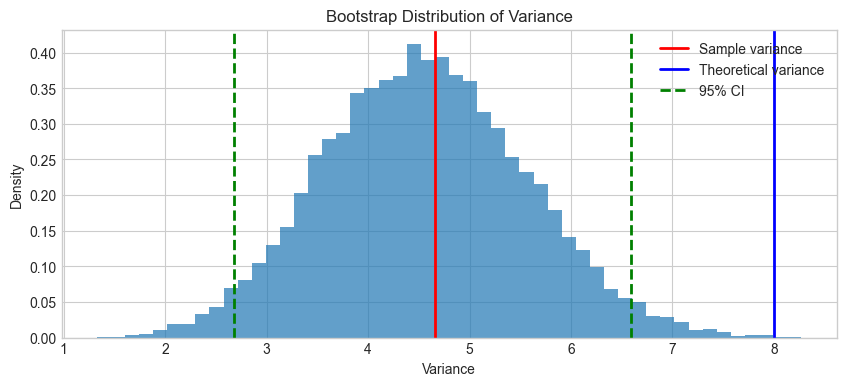

In [146]:
# Exercise 5.4: Bootstrap CI for variance
np.random.seed(42)
# shape=2, rate=0.5, so scale=2
gamma_sample = stats.gamma(a=2, scale=2).rvs(size=50)

# Theoretical variance: α/β² = 2/0.25 = 8
theoretical_var = 2 / (0.5**2)

# Bootstrap CI for variance
lower, upper, boot_vars = bootstrap_ci(gamma_sample, lambda x: np.var(x, ddof=1))

print(f"Sample variance: {np.var(gamma_sample, ddof=1):.3f}")
print(f"Bootstrap 95% CI: ({lower:.3f}, {upper:.3f})")
print(f"Theoretical variance: {theoretical_var:.3f}")
print(f"\nDoes CI contain theoretical? {lower <= theoretical_var <= upper}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(boot_vars, bins=50, density=True, alpha=0.7)
ax.axvline(np.var(gamma_sample, ddof=1), color='red', linestyle='-', linewidth=2, label='Sample variance')
ax.axvline(theoretical_var, color='blue', linestyle='-', linewidth=2, label='Theoretical variance')
ax.axvline(lower, color='green', linestyle='--', linewidth=2, label='95% CI')
ax.axvline(upper, color='green', linestyle='--', linewidth=2)
ax.set_xlabel('Variance')
ax.set_ylabel('Density')
ax.set_title('Bootstrap Distribution of Variance')
ax.legend()
plt.show()

---
## 6. Visualization with Seaborn

Seaborn provides elegant functions for visualizing distributions.

**Example:**

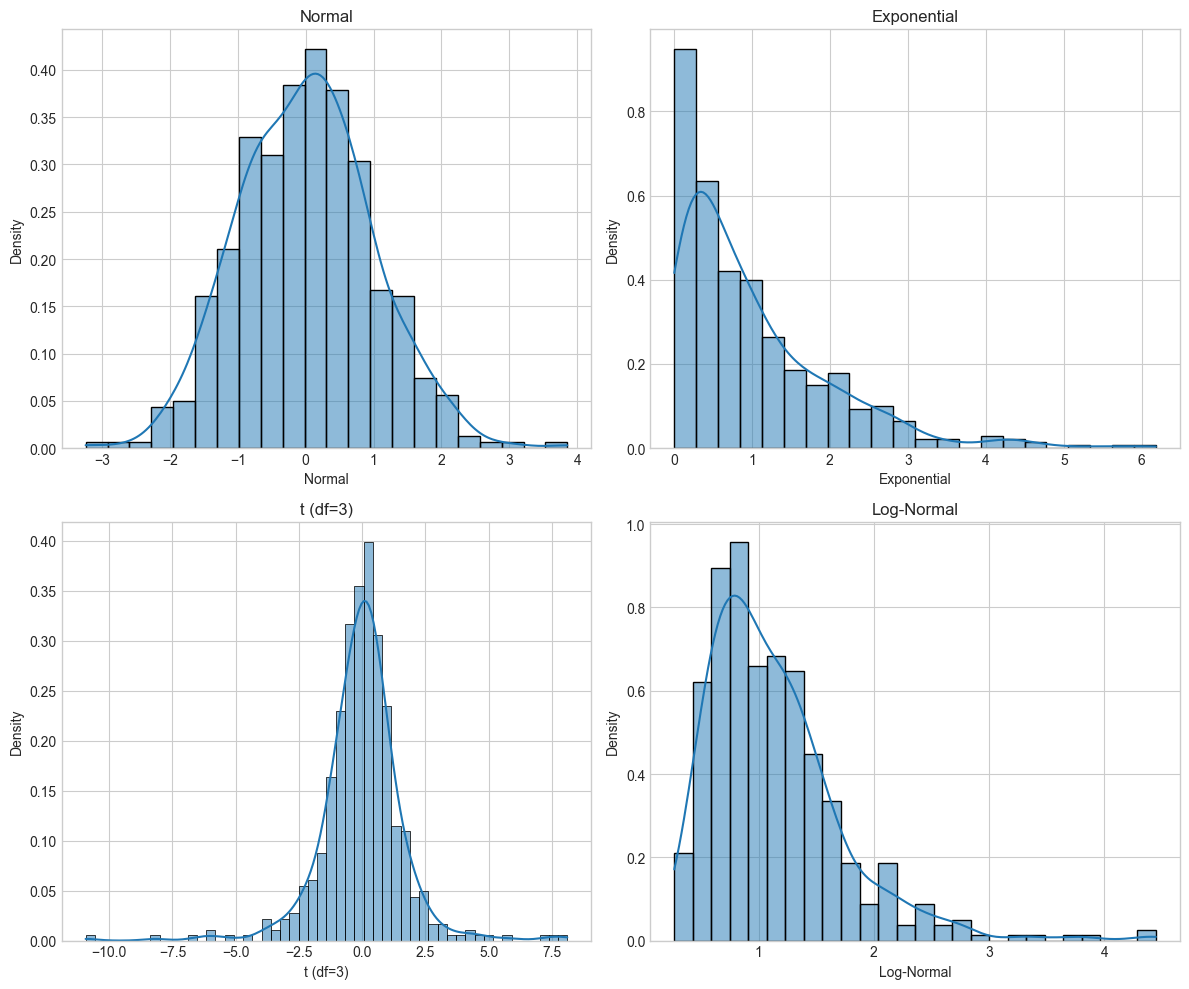

In [147]:
# Generate data from different distributions
np.random.seed(42)
data = pd.DataFrame({
    'Normal': stats.norm(0, 1).rvs(500),
    'Exponential': stats.expon(scale=1).rvs(500),
    't (df=3)': stats.t(df=3).rvs(500),
    'Log-Normal': stats.lognorm(s=0.5).rvs(500)
})

# Histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, col in zip(axes.flat, data.columns):
    sns.histplot(data[col], kde=True, ax=ax, stat='density')
    ax.set_title(col)
plt.tight_layout()
plt.show()

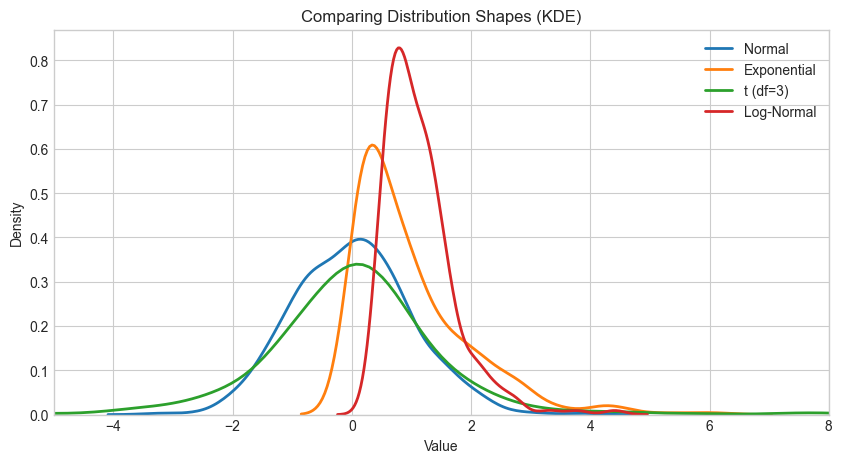

In [148]:
# KDE plots for comparison
fig, ax = plt.subplots(figsize=(10, 5))
for col in data.columns:
    sns.kdeplot(data[col], ax=ax, label=col, linewidth=2)
ax.set_xlabel('Value')
ax.set_title('Comparing Distribution Shapes (KDE)')
ax.legend()
ax.set_xlim(-5, 8)
plt.show()

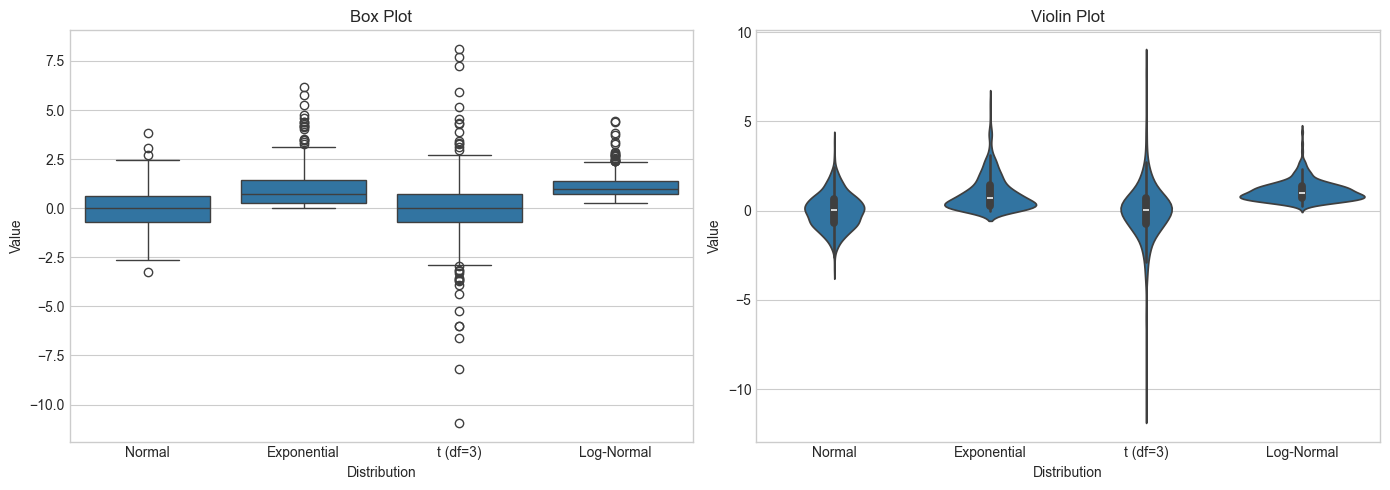

In [149]:
# Box plots and violin plots
data_long = data.melt(var_name='Distribution', value_name='Value')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=data_long, x='Distribution', y='Value', ax=axes[0])
axes[0].set_title('Box Plot')

sns.violinplot(data=data_long, x='Distribution', y='Value', ax=axes[1])
axes[1].set_title('Violin Plot')

plt.tight_layout()
plt.show()

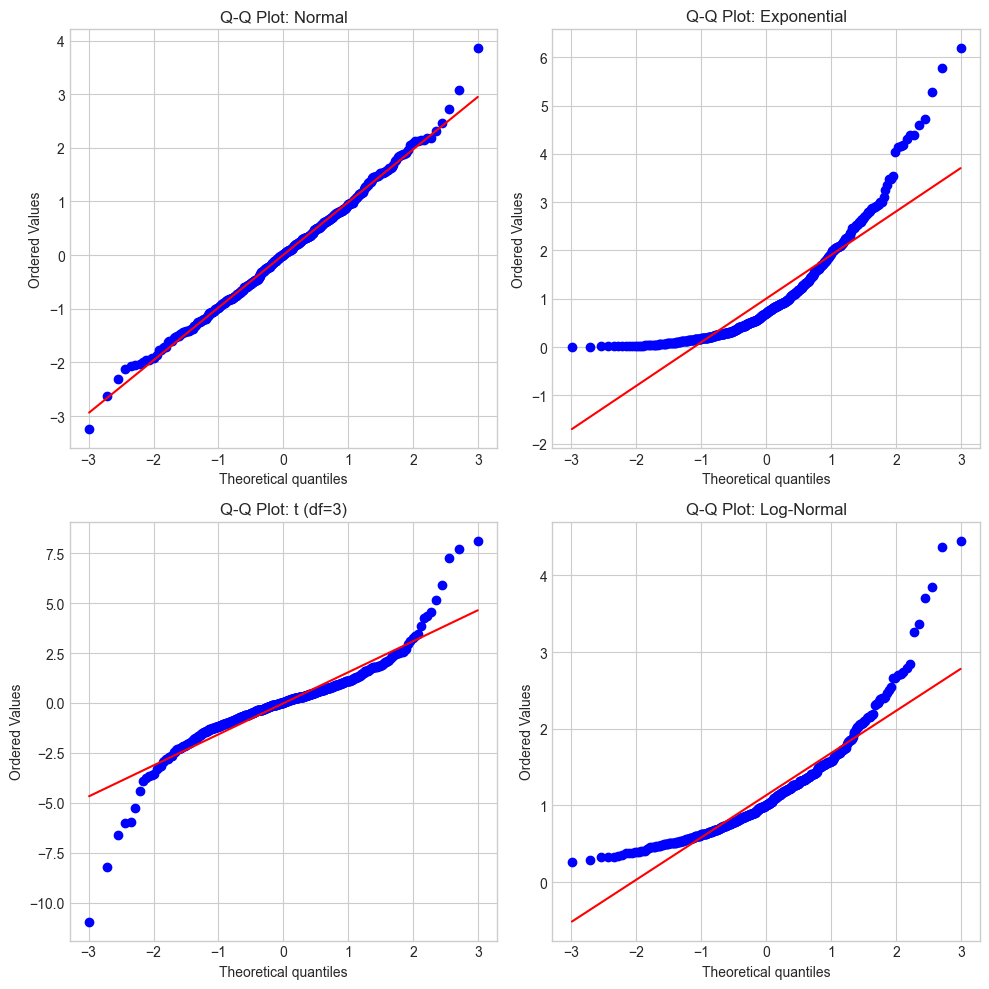

→ Points on diagonal = normally distributed
→ Curved tails = skewed or heavy-tailed distribution


In [150]:
# Q-Q plot to check normality
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, col in zip(axes.flat, data.columns):
    stats.probplot(data[col], dist='norm', plot=ax)
    ax.set_title(f'Q-Q Plot: {col}')

plt.tight_layout()
plt.show()

print("→ Points on diagonal = normally distributed")
print("→ Curved tails = skewed or heavy-tailed distribution")

### Exercise 6: Visualization

**6.1** Generate 500 samples each from Normal(100, 15²), Gamma(α=5, β=0.05), and Log-Normal(μ=4.6, σ=0.15). Create overlapping KDE plots to compare their shapes.

**6.2** For the same data, create Q-Q plots to assess which distribution is closest to normal.

**6.3** Create a figure with both histograms and theoretical PDFs overlaid (like in section 3).

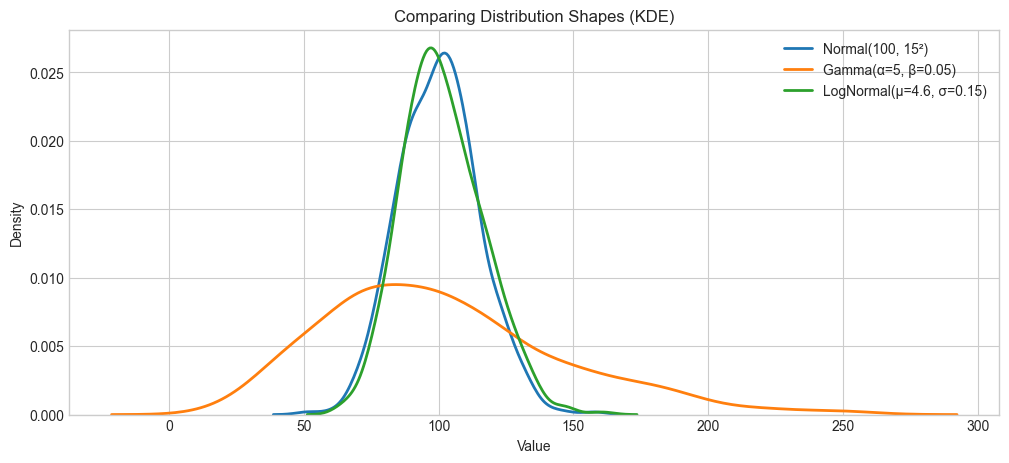

→ All three distributions have similar means (~100)
→ But different shapes: Normal is symmetric, Gamma and Log-Normal are right-skewed


In [151]:
# Exercise 6.1: KDE comparison
np.random.seed(42)

# Generate samples
# Note: Gamma with α=5, β=0.05 → scale=1/0.05=20, mean=α/β=100
# Log-normal with μ=4.6, σ=0.15 → mean ≈ exp(4.6 + 0.15²/2) ≈ 100
data_6 = pd.DataFrame({
    'Normal(100, 15²)': stats.norm(100, 15).rvs(500),
    'Gamma(α=5, β=0.05)': stats.gamma(a=5, scale=20).rvs(500),
    'LogNormal(μ=4.6, σ=0.15)': stats.lognorm(s=0.15, scale=np.exp(4.6)).rvs(500)
})

fig, ax = plt.subplots(figsize=(12, 5))
for col in data_6.columns:
    sns.kdeplot(data_6[col], ax=ax, label=col, linewidth=2)
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Comparing Distribution Shapes (KDE)')
ax.legend()
plt.show()

print("→ All three distributions have similar means (~100)")
print("→ But different shapes: Normal is symmetric, Gamma and Log-Normal are right-skewed")

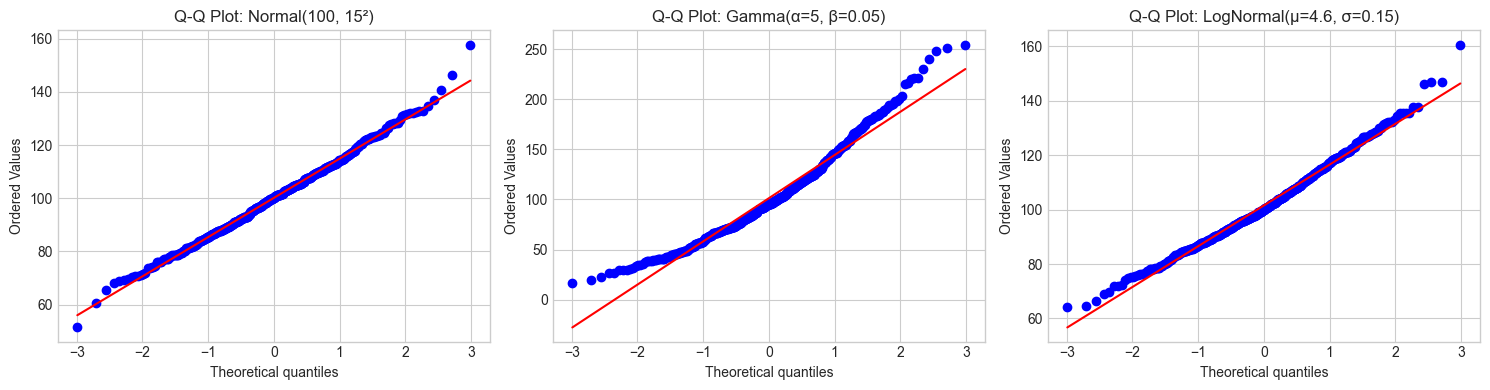

→ Normal shows straight line (as expected)
→ Gamma and Log-Normal show curvature in tails (right-skewed)


In [152]:
# Exercise 6.2: Q-Q plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, data_6.columns):
    stats.probplot(data_6[col], dist='norm', plot=ax)
    ax.set_title(f'Q-Q Plot: {col}')

plt.tight_layout()
plt.show()

print("→ Normal shows straight line (as expected)")
print("→ Gamma and Log-Normal show curvature in tails (right-skewed)")

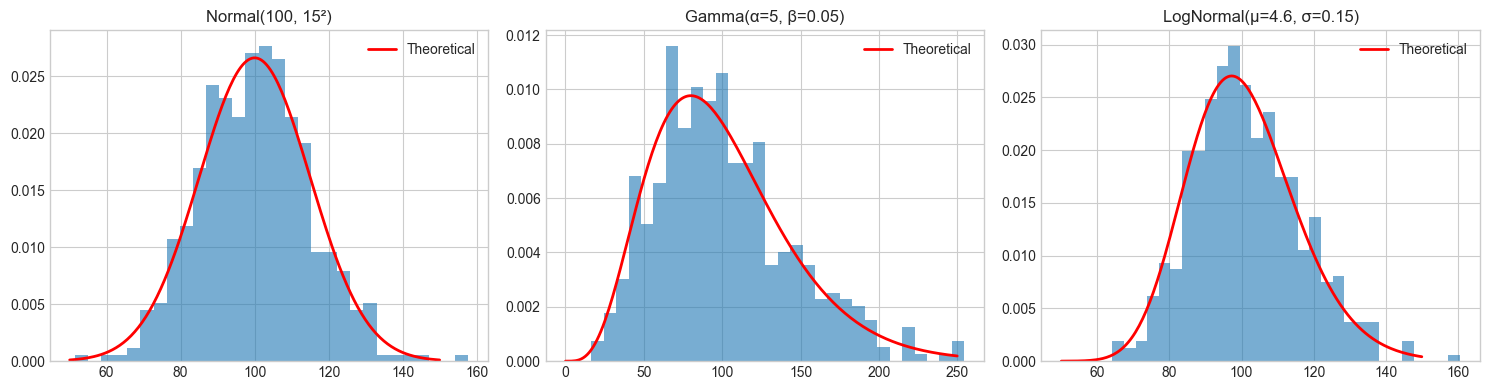

In [153]:
# Exercise 6.3: Histograms with theoretical PDFs
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Normal
ax = axes[0]
ax.hist(data_6['Normal(100, 15²)'], bins=30, density=True, alpha=0.6)
x = np.linspace(50, 150, 200)
ax.plot(x, stats.norm(100, 15).pdf(x), 'r-', linewidth=2, label='Theoretical')
ax.set_title('Normal(100, 15²)')
ax.legend()

# Gamma
ax = axes[1]
ax.hist(data_6['Gamma(α=5, β=0.05)'], bins=30, density=True, alpha=0.6)
x = np.linspace(0, 250, 200)
ax.plot(x, stats.gamma(a=5, scale=20).pdf(x), 'r-', linewidth=2, label='Theoretical')
ax.set_title('Gamma(α=5, β=0.05)')
ax.legend()

# Log-normal
ax = axes[2]
ax.hist(data_6['LogNormal(μ=4.6, σ=0.15)'], bins=30, density=True, alpha=0.6)
x = np.linspace(50, 150, 200)
ax.plot(x, stats.lognorm(s=0.15, scale=np.exp(4.6)).pdf(x), 'r-', linewidth=2, label='Theoretical')
ax.set_title('LogNormal(μ=4.6, σ=0.15)')
ax.legend()

plt.tight_layout()
plt.show()

---
## 7. Error Propagation

When measurements have uncertainty, how do we calculate the uncertainty in derived quantities? Monte Carlo simulation offers a flexible approach.

Monte Carlo Error Propagation:
BMI = 22.86 ± 0.31 kg/m²
Relative uncertainty: 1.4%


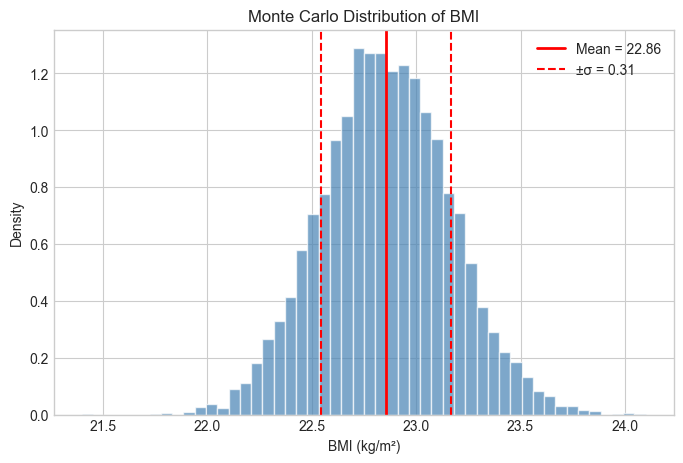

In [154]:
# Monte Carlo error propagation for BMI
np.random.seed(42)
n_samples = 10000

# Measurements with uncertainty
weight = 70.0  # kg
sigma_weight = 0.5  # kg
height = 1.75  # m
sigma_height = 0.01  # m

# Sample from input distributions
weight_samples = stats.norm(loc=weight, scale=sigma_weight).rvs(n_samples)
height_samples = stats.norm(loc=height, scale=sigma_height).rvs(n_samples)

# Compute BMI for each sample
bmi_samples = weight_samples / (height_samples**2)

# Statistics
bmi_mc_mean = np.mean(bmi_samples)
bmi_mc_std = np.std(bmi_samples)

print("Monte Carlo Error Propagation:")
print(f"BMI = {bmi_mc_mean:.2f} ± {bmi_mc_std:.2f} kg/m²")
print(f"Relative uncertainty: {100*bmi_mc_std/bmi_mc_mean:.1f}%")

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(bmi_samples, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='white')
ax.axvline(bmi_mc_mean, color='red', linewidth=2, label=f'Mean = {bmi_mc_mean:.2f}')
ax.axvline(bmi_mc_mean - bmi_mc_std, color='red', linestyle='--', label=f'±σ = {bmi_mc_std:.2f}')
ax.axvline(bmi_mc_mean + bmi_mc_std, color='red', linestyle='--')
ax.set_xlabel('BMI (kg/m²)')
ax.set_ylabel('Density')
ax.set_title('Monte Carlo Distribution of BMI')
ax.legend()
plt.show()

### Exercise 7.1: Drug Concentration Calculation

A drug concentration is calculated as: $C = \frac{m}{V}$ where mass $m = 5.0 \pm 0.1$ mg and volume $V = 100.0 \pm 2.0$ mL.

Calculate the concentration and its uncertainty using both analytical and Monte Carlo methods.

In [155]:
# Solution 7.1
m = 5.0    # mg
sigma_m = 0.1  # mg
V = 100.0  # mL
sigma_V = 2.0  # mL

# Analytical: C = m/V
C = m / V
sigma_C = abs(C) * np.sqrt((sigma_m/m)**2 + (sigma_V/V)**2)
print("Analytical Method:")
print(f"C = {C:.4f} ± {sigma_C:.4f} mg/mL")
print(f"C = {C*1000:.2f} ± {sigma_C*1000:.2f} μg/mL")
print(f"Relative uncertainty: {100*sigma_C/C:.2f}%")

# Monte Carlo
np.random.seed(42)
n_samples = 10000
m_samples = stats.norm(loc=m, scale=sigma_m).rvs(n_samples)
V_samples = stats.norm(loc=V, scale=sigma_V).rvs(n_samples)
C_samples = m_samples / V_samples

C_mc = np.mean(C_samples)
sigma_C_mc = np.std(C_samples)

print("\nMonte Carlo Method:")
print(f"C = {C_mc:.4f} ± {sigma_C_mc:.4f} mg/mL")
print(f"Relative uncertainty: {100*sigma_C_mc/C_mc:.2f}%")

Analytical Method:
C = 0.0500 ± 0.0014 mg/mL
C = 50.00 ± 1.41 μg/mL
Relative uncertainty: 2.83%

Monte Carlo Method:
C = 0.0500 ± 0.0014 mg/mL
Relative uncertainty: 2.85%


### Exercise 7.2: Enzyme Kinetics - Michaelis-Menten

The Michaelis-Menten equation is: $v = \frac{V_{max} \cdot [S]}{K_m + [S]}$

Given:
- $V_{max} = 100 \pm 5$ μmol/min
- $K_m = 10 \pm 1$ μM
- $[S] = 20 \pm 2$ μM

Use Monte Carlo to estimate the reaction velocity and its uncertainty.

Michaelis-Menten Velocity:
v = 66.53 ± 4.63 μmol/min
95% CI: [57.68, 75.83] μmol/min

Point estimate (no uncertainty): 66.67 μmol/min


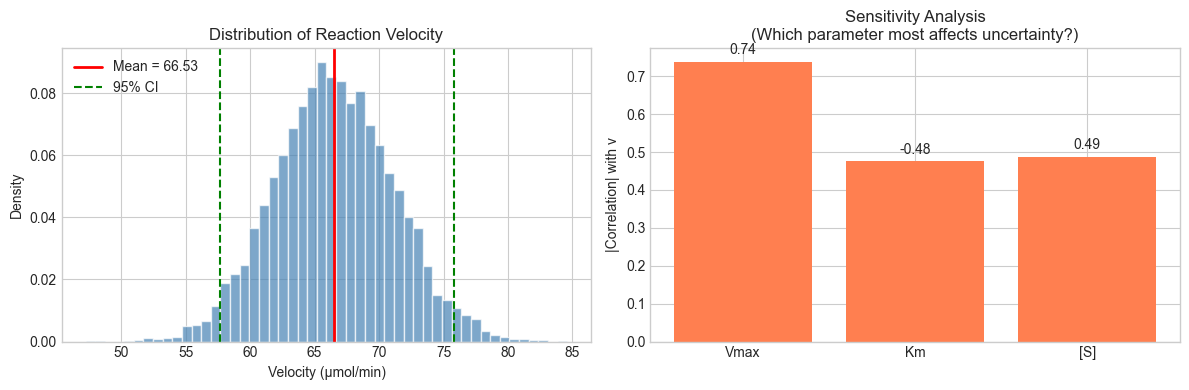

In [156]:
# Solution 7.2
np.random.seed(42)
n_samples = 10000

# Parameters with uncertainty
Vmax = 100  # μmol/min
sigma_Vmax = 5
Km = 10  # μM
sigma_Km = 1
S = 20  # μM
sigma_S = 2

# Sample from distributions
Vmax_samples = stats.norm(loc=Vmax, scale=sigma_Vmax).rvs(n_samples)
Km_samples = stats.norm(loc=Km, scale=sigma_Km).rvs(n_samples)
S_samples = stats.norm(loc=S, scale=sigma_S).rvs(n_samples)

# Michaelis-Menten equation
v_samples = (Vmax_samples * S_samples) / (Km_samples + S_samples)

# Results
v_mean = np.mean(v_samples)
v_std = np.std(v_samples)
v_ci = np.percentile(v_samples, [2.5, 97.5])

print("Michaelis-Menten Velocity:")
print(f"v = {v_mean:.2f} ± {v_std:.2f} μmol/min")
print(f"95% CI: [{v_ci[0]:.2f}, {v_ci[1]:.2f}] μmol/min")

# Point estimate for comparison
v_point = (Vmax * S) / (Km + S)
print(f"\nPoint estimate (no uncertainty): {v_point:.2f} μmol/min")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution of v
axes[0].hist(v_samples, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='white')
axes[0].axvline(v_mean, color='red', linewidth=2, label=f'Mean = {v_mean:.2f}')
axes[0].axvline(v_ci[0], color='green', linestyle='--', label=f'95% CI')
axes[0].axvline(v_ci[1], color='green', linestyle='--')
axes[0].set_xlabel('Velocity (μmol/min)')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Reaction Velocity')
axes[0].legend()

# Sensitivity: which parameter contributes most to uncertainty?
# Compute correlation between each input and output
correlations = {
    'Vmax': np.corrcoef(Vmax_samples, v_samples)[0, 1],
    'Km': np.corrcoef(Km_samples, v_samples)[0, 1],
    '[S]': np.corrcoef(S_samples, v_samples)[0, 1]
}

axes[1].bar(correlations.keys(), [abs(c) for c in correlations.values()], color='coral')
axes[1].set_ylabel('|Correlation| with v')
axes[1].set_title('Sensitivity Analysis\n(Which parameter most affects uncertainty?)')
for i, (k, v) in enumerate(correlations.items()):
    axes[1].text(i, abs(v) + 0.02, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

---
## Summary

### Key scipy.stats methods:

| Method | Description |
|--------|-------------|
| `.rvs(size=n)` | Generate random samples |
| `.pdf(x)` / `.pmf(x)` | Probability density/mass at x |
| `.cdf(x)` | P(X ≤ x) |
| `.ppf(q)` | Inverse CDF (quantile) |
| `.mean()`, `.var()`, `.std()` | Moments |
| `.stats(moments='mvsk')` | Mean, variance, skewness, kurtosis |
| `.interval(confidence)` | Confidence interval |

### Common distributions:

| Distribution | scipy.stats | Key Parameter(s) |
|--------------|-------------|------------------|
| Bernoulli | `bernoulli(p)` | p = success probability |
| Binomial | `binom(n, p)` | n = trials, p = success prob |
| Poisson | `poisson(mu)` | mu = λ (rate) |
| Normal | `norm(loc, scale)` | loc = μ, scale = σ |
| t | `t(df)` | df = degrees of freedom |
| Exponential | `expon(scale)` | scale = 1/λ |
| Gamma | `gamma(a, scale)` | a = shape, scale = 1/β |
| Log-Normal | `lognorm(s, scale)` | s = σ, scale = exp(μ) |